# Data Preprocessing

In [1]:
# Merging all csv and convert it into a unique parquet file
from homeserv_inter.cli import convert_csv_to_parquet
convert_csv_to_parquet()

In [1]:
# Output:
# Reading organisation.csv took 0.017 sec
# Reading equipment.csv took 9.239 sec
# Reading contract_history.csv took 26.117 sec
# Reading intervention_test.csv took 0.950 sec
# Reading intervention_train.csv took 4.777 sec
# Reading intervention_history.csv took 48.357 sec
# Reading nature-code csv took 0.020 sec
# Merging all train set took 77.987 sec
# Merging all test set took 19.109 sec

In [ ]:
# 'Cleaned' sets are datasets ready to be used to train & predict. They contains also the features engineered.
from homeserv_inter.datahandler import generate_cleaned_sets
generate_cleaned_sets()

In [2]:
# Output:

# Gen clean trainset in progress...
# Reading train set took 5.822 sec
# Building timestamp features took 13.055 sec
# One Hot Encoding for CATEGORICAL_FEATURES with pd.get_dummies took 24.379 sec
# Building str features took 44.395 sec
# Cleaning NaNs for label encoding took 15.942 sec
# Encoding labels took 114.318 sec
# Saving into /home/guillaume.jeusel/src/homeserv-inter/data/cleaned/train_cleaned.parquet.gzip took 14.776 sec
# Gen clean trainset took 194.291 sec

# Gen clean testset in progress...
# Reading test set took 1.431 sec
# Building timestamp features took 2.820 sec
# One Hot Encoding for CATEGORICAL_FEATURES with pd.get_dummies took 4.723 sec
# Building str features took 8.838 sec
# Cleaning NaNs for label encoding took 3.445 sec
# Encoding labels took 22.083 sec
# Saving into /home/guillaume.jeusel/src/homeserv-inter/data/cleaned/test_cleaned.parquet.gzip took 3.189 sec
# Gen clean testset took 38.781 sec

# LightGBM Model

In [3]:
from homeserv_inter.model import LgbHomeService
lgbmodel = LgbHomeService(debug=True, drop_lowimp_features=True)

In [4]:
booster = lgbmodel.validate()

Reading train set took 3.831 sec
Replacing -1 categorical by np.nan took 0.039 sec
Dropping low importance features !
[1]	training's auc: 0.77331	valid_1's auc: 0.646931
[2]	training's auc: 0.80934	valid_1's auc: 0.685712
[3]	training's auc: 0.818334	valid_1's auc: 0.689258
[4]	training's auc: 0.826186	valid_1's auc: 0.696464
[5]	training's auc: 0.833763	valid_1's auc: 0.701647
[6]	training's auc: 0.843504	valid_1's auc: 0.704178
[7]	training's auc: 0.851137	valid_1's auc: 0.711296
[8]	training's auc: 0.852423	valid_1's auc: 0.713373
[9]	training's auc: 0.854014	valid_1's auc: 0.709709
[10]	training's auc: 0.861276	valid_1's auc: 0.714055
[11]	training's auc: 0.865732	valid_1's auc: 0.716073
[12]	training's auc: 0.867344	valid_1's auc: 0.716173
[13]	training's auc: 0.872578	valid_1's auc: 0.713035
[14]	training's auc: 0.876965	valid_1's auc: 0.715786
[15]	training's auc: 0.87961	valid_1's auc: 0.713312
[16]	training's auc: 0.881963	valid_1's auc: 0.714771
[17]	training's auc: 0.883699	

In [5]:
lgbmodel = LgbHomeService(debug=False, drop_lowimp_features=True)

In [6]:
eval_hist = lgbmodel.cv(num_boost_round=30, nfolds=5)

Reading train set took 3.526 sec
Replacing -1 categorical by np.nan took 0.999 sec
Dropping low importance features !
[1]	cv_agg's auc: 0.697839 + 0.00141853
[2]	cv_agg's auc: 0.698786 + 0.0014249
[3]	cv_agg's auc: 0.712562 + 0.00144279
[4]	cv_agg's auc: 0.718969 + 0.00160412
[5]	cv_agg's auc: 0.716993 + 0.00161171
[6]	cv_agg's auc: 0.721293 + 0.00167892
[7]	cv_agg's auc: 0.72043 + 0.00170616
[8]	cv_agg's auc: 0.721114 + 0.00167343
[9]	cv_agg's auc: 0.723971 + 0.00163693
[10]	cv_agg's auc: 0.726112 + 0.0015399
[11]	cv_agg's auc: 0.728074 + 0.00154367
[12]	cv_agg's auc: 0.727756 + 0.00154309
[13]	cv_agg's auc: 0.72893 + 0.00152284
[14]	cv_agg's auc: 0.729725 + 0.00152533
[15]	cv_agg's auc: 0.730541 + 0.00155008
[16]	cv_agg's auc: 0.730071 + 0.00156224
[17]	cv_agg's auc: 0.730517 + 0.00156726
[18]	cv_agg's auc: 0.730855 + 0.0015675
[19]	cv_agg's auc: 0.730555 + 0.00154812
[20]	cv_agg's auc: 0.730967 + 0.00154479
[21]	cv_agg's auc: 0.731142 + 0.00152656
[22]	cv_agg's auc: 0.730903 + 0.001

In [7]:
import plotlyink
plotlyink.register_pandas_iplot_accessor()

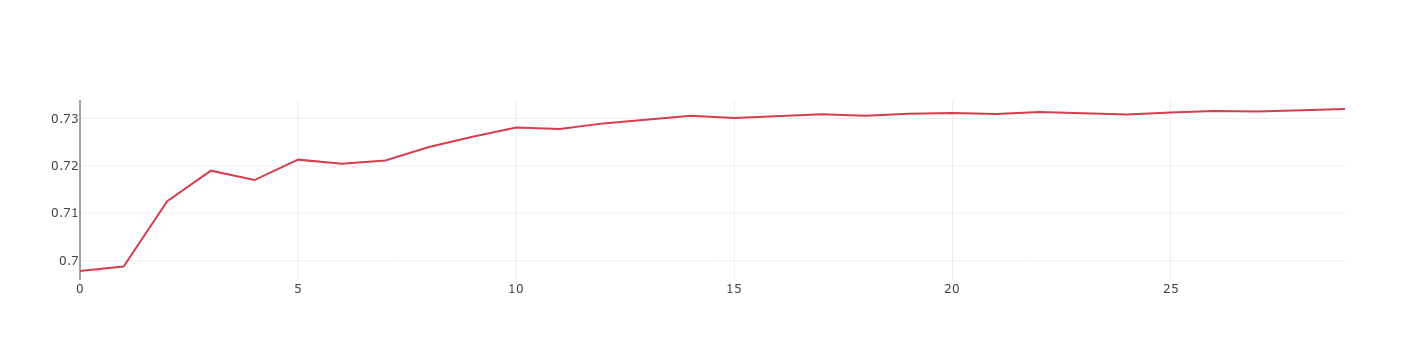

In [8]:
df = pd.DataFrame(eval_hist).drop(columns=['auc-stdv'])
df.iplot.scatter()

# Top Feature Importance

In [ ]:
#lgbmodel = LgbHomeService(debug=False, drop_lowimp_features=False)
#booster = lgbmodel.validate(num_boost_round=500)

In [12]:
booster = lgb.Booster(model_file='model_bank/lightgbm_model_03-09h-10m.txt')

In [13]:
from homeserv_inter.model import get_df_importance
df = get_df_importance(booster)

In [18]:
df.head(20)

,importance
SCHEDULED_END_DATE_dayofyear,4.341414
RESOURCE_ID,4.248485
ADRESSE,3.193939
MARQUE_LIB,2.785859
bulletin_creation_TD_INSTALL_DATE_days,2.484848
CIA,2.474747
bulletin_creation_TD_SCHEDULED_END_DATE_days,2.456566
L2_NAME,2.361616
ratio_duration_contract_td_install_days,2.268687
COMMENTAIRE_BI_len,2.121212


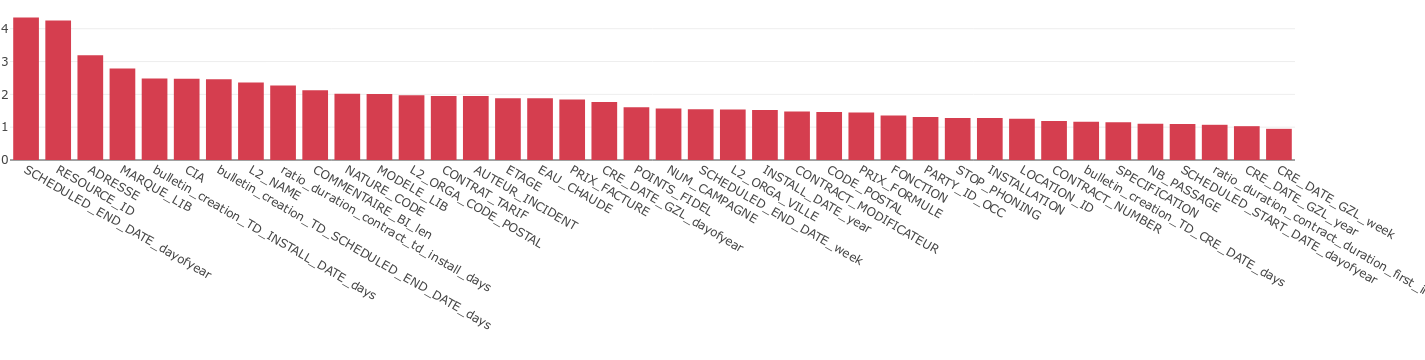

In [26]:
df.head(40).iplot.bar(layout={'margin': {'b': 200, 't':10, 'l': 10, 'r': 130}})

# To reproduce 6th place score:

In [ ]:
from homeserv_inter.cli import convert_csv_to_parquet
convert_csv_to_parquet()
from homeserv_inter.datahandler import generate_cleaned_sets
generate_cleaned_sets()

from homeserv_inter.model import LgbHomeService
lgbmodel = LgbHomeService(debug=False, drop_lowimp_features=True)
lgbmodel.generate_submit(num_boost_round=3800)